In [92]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [233]:
data = pd.read_csv('first_ergo_by_2_seasons.csv',encoding='utf-8',index_col=0)

In [234]:
data.describe()

,Rf,VT,VE_ergo,IV,VO2,VCO2,RQ,O2exp,CO2exp,VE/VO2,...,PetO2,PetCO2,SpO2,Power,Revolution,P Сист.,P. диастол.,season_part,Маркер,Комн. Темп.
count,24789.000000,24789.000000,24789.000000,24789.000000,24789.000000,24789.000000,24789.000000,24789.000000,24789.000000,24789.000000,...,24789.000000,24789.000000,24485.0,24784.000000,20678.000000,347.000000,347.000000,24789.000000,0.0,557.000000
mean,29.724562,2.798460,84.303179,2188.551858,2884.389945,2965.933931,1.001694,455.322104,130.298362,27.457731,...,101.936262,40.783573,0.0,268.770537,69.021472,158.930836,78.962536,1.485538,NaN,23.115619
std,10.433433,0.772282,39.350340,719.845950,903.277052,1168.627678,0.127321,134.624527,37.460087,5.758438,...,8.648198,4.330681,0.0,102.653235,5.315324,26.007132,10.674711,0.499801,NaN,0.092664
min,0.000000,0.158000,0.000000,79.000000,0.000000,0.000000,0.000000,32.200000,0.200000,0.000000,...,78.000000,1.000000,0.0,0.000000,0.000000,100.000000,50.000000,1.000000,NaN,23.000000
25%,22.190000,2.265000,52.482000,1690.000000,2160.662353,1964.721931,0.910000,357.400000,104.742857,23.500000,...,95.000000,38.000000,0.0,186.000000,66.000000,140.000000,70.000000,1.000000,NaN,23.000000
50%,28.440000,2.791000,78.067000,2054.000000,2959.840406,2944.731942,0.990000,451.910256,128.385714,26.000000,...,102.000000,41.000000,0.0,278.000000,68.000000,160.000000,80.000000,1.000000,NaN,23.200000
75%,35.230000,3.261000,109.280000,2560.000000,3604.327412,3921.323350,1.090000,539.966667,153.533333,30.100000,...,108.000000,44.000000,0.0,354.000000,72.000000,180.000000,90.000000,2.000000,NaN,23.200000
max,106.330000,5.589000,253.000000,5682.000000,6299.277739,6644.455872,1.620000,923.228571,280.600000,136.700000,...,136.000000,53.000000,0.0,505.000000,92.000000,240.000000,105.000000,2.000000,NaN,23.300000


In [236]:
dict(data.isna().sum() != 0)

{'t': False,
 'Rf': False,
 'VT': False,
 'VE_ergo': False,
 'IV': False,
 'VO2': False,
 'VCO2': False,
 'RQ': False,
 'O2exp': False,
 'CO2exp': False,
 'VE/VO2': False,
 'VE/VCO2': False,
 'VO2/Kg': False,
 'METS': False,
 'ЧСС': True,
 'VO2/HR': True,
 'FeO2': False,
 'FeCO2': False,
 'FetO2': False,
 'FetCO2': False,
 'FiO2': False,
 'FiCO2': False,
 'PeO2': False,
 'PeCO2': False,
 'PetO2': False,
 'PetCO2': False,
 'SpO2': True,
 'Power': True,
 'Revolution': True,
 'P Сист.': True,
 'P. диастол.': True,
 'Фаза': True,
 'player': False,
 'season': False,
 'season_part': False,
 'Маркер': True,
 'Комн. Темп.': True}

In [237]:
data.isna().sum()

t                  0
Rf                 0
VT                 0
VE_ergo            0
IV                 0
VO2                0
VCO2               0
RQ                 0
O2exp              0
CO2exp             0
VE/VO2             0
VE/VCO2            0
VO2/Kg             0
METS               0
ЧСС                7
VO2/HR             7
FeO2               0
FeCO2              0
FetO2              0
FetCO2             0
FiO2               0
FiCO2              0
PeO2               0
PeCO2              0
PetO2              0
PetCO2             0
SpO2             304
Power              5
Revolution      4111
P Сист.        24442
P. диастол.    24442
Фаза             741
player             0
season             0
season_part        0
Маркер         24789
Комн. Темп.    24232
dtype: int64

In [238]:
# interpolate
# near = ['ЧСС', 'VO2/HR','Revolution', 'Power']
# Фаза - nearest 
# SpO2 = most popular?
# Маркер, Комн. Темп., P Сист. , P. диастол.   - выкинуть?

In [239]:
data['Фаза'].unique()

array(['EXERCISE', 'RECOVERY', 'WARMUP', 'REST', 'NONE', nan],
      dtype=object)

In [240]:
data['SpO2'].unique()

array([ 0., nan])

In [241]:
data.drop(columns = ['Маркер', 'Комн. Темп.', ], inplace = True)

In [242]:
data[['ЧСС', 'VO2/HR','Revolution', 'Power', 'Фаза']]=\
data[['ЧСС', 'VO2/HR','Revolution', 'Power', 'Фаза']].fillna(method = 'ffill')

In [243]:
data['SpO2'] = data['SpO2'].fillna(0.)

In [244]:
data[['P Сист.','P. диастол.']] = data[['P Сист.','P. диастол.']].fillna(method = 'bfill').fillna(method = 'ffill')

In [245]:
data.isna().sum()

t              0
Rf             0
VT             0
VE_ergo        0
IV             0
VO2            0
VCO2           0
RQ             0
O2exp          0
CO2exp         0
VE/VO2         0
VE/VCO2        0
VO2/Kg         0
METS           0
ЧСС            0
VO2/HR         0
FeO2           0
FeCO2          0
FetO2          0
FetCO2         0
FiO2           0
FiCO2          0
PeO2           0
PeCO2          0
PetO2          0
PetCO2         0
SpO2           0
Power          0
Revolution     0
P Сист.        0
P. диастол.    0
Фаза           0
player         0
season         0
season_part    0
dtype: int64

In [246]:
data['t'] = pd.to_datetime(data['t'])

In [247]:
data['t']

1       2022-09-08 00:03:37
2       2022-09-08 00:03:41
3       2022-09-08 00:03:44
4       2022-09-08 00:03:47
5       2022-09-08 00:03:50
                ...        
24785   2022-09-08 00:13:13
24786   2022-09-08 00:13:14
24787   2022-09-08 00:13:15
24788   2022-09-08 00:13:16
24789   2022-09-08 00:13:17
Name: t, Length: 24789, dtype: datetime64[ns]

In [248]:
def plot_series(series,player,column):
    plt.figure(figsize = (20,9))
    plt.plot(series[series['player'] == player]['t'],series[series['player'] == player][column])
    plt.grid(True)
    plt.xlabel('Time')
    plt.ylabel(column)

In [250]:
temp_data = data[(data['season'] == '2020-2021') & (data['season_part'] == 1)]

In [251]:
draw_columns = [x for x in list(data.columns) if x not in ['season_part','season','player','Фаза','t','P Сист.',
                                                           'P. диастол.']]

In [253]:
len(draw_columns)

28

/var/folders/7l/0qq42vs92fj4kw3j3dsl2ttw0000gn/T/ipykernel_48588/2387118618.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (20,9))


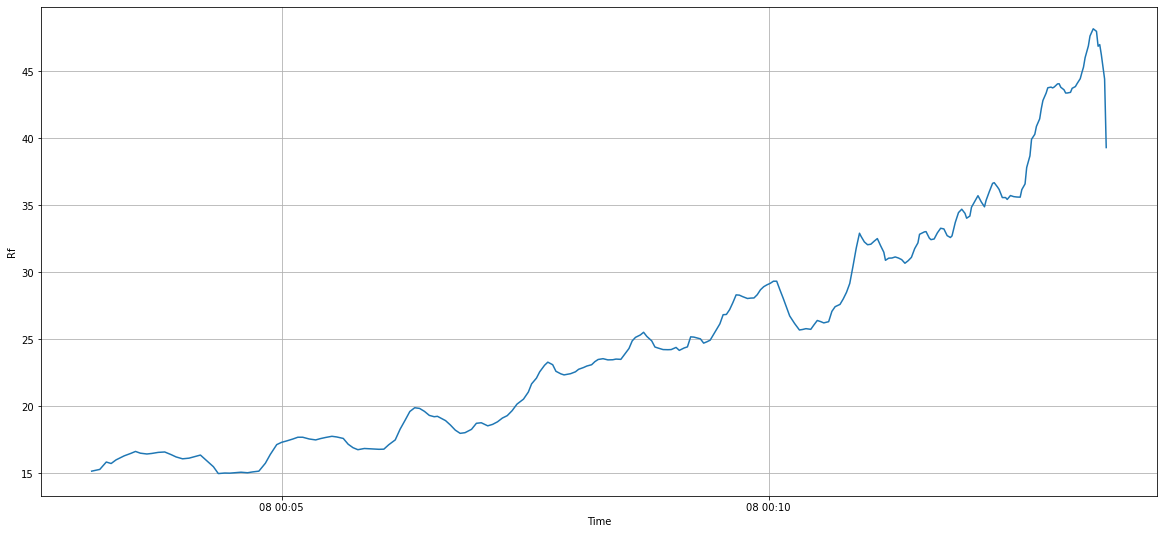

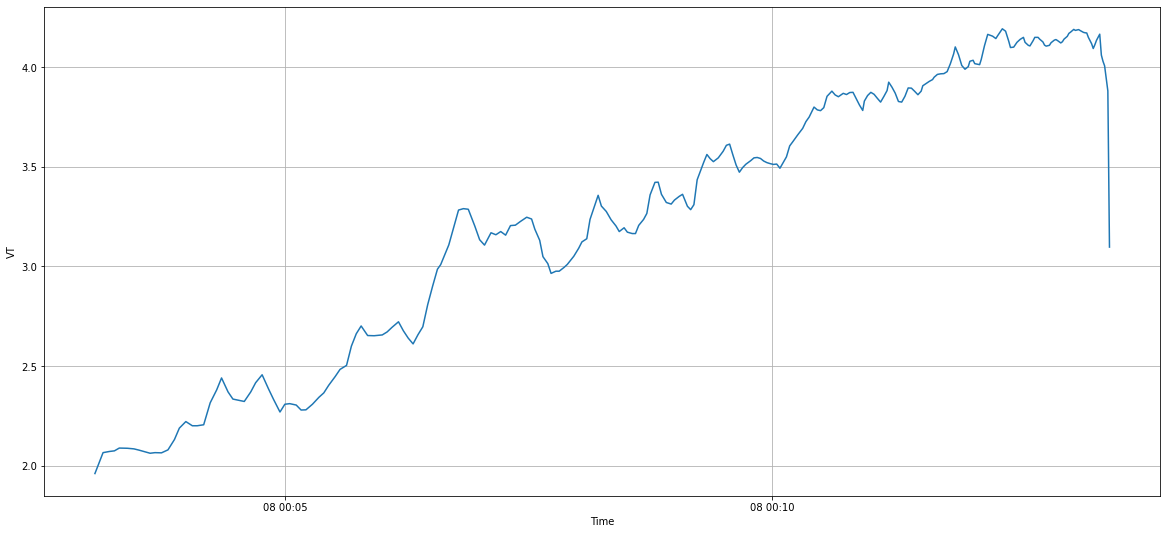

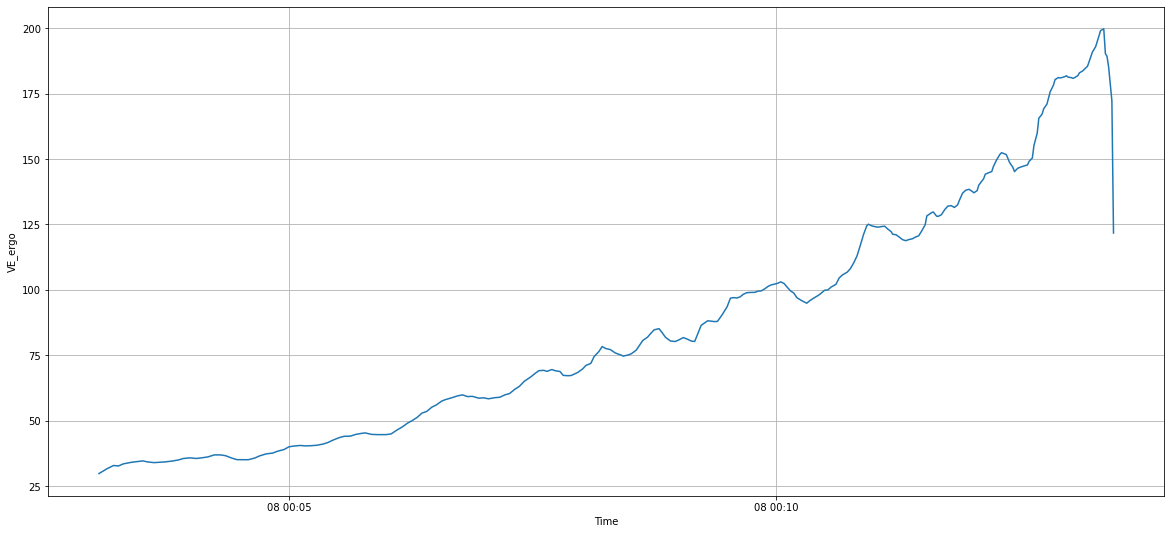

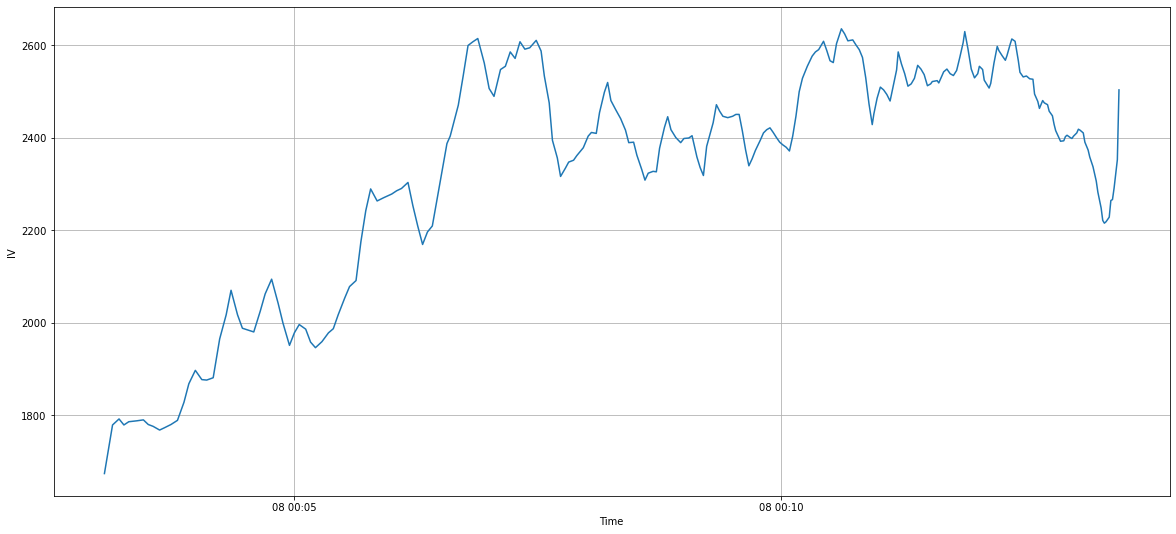

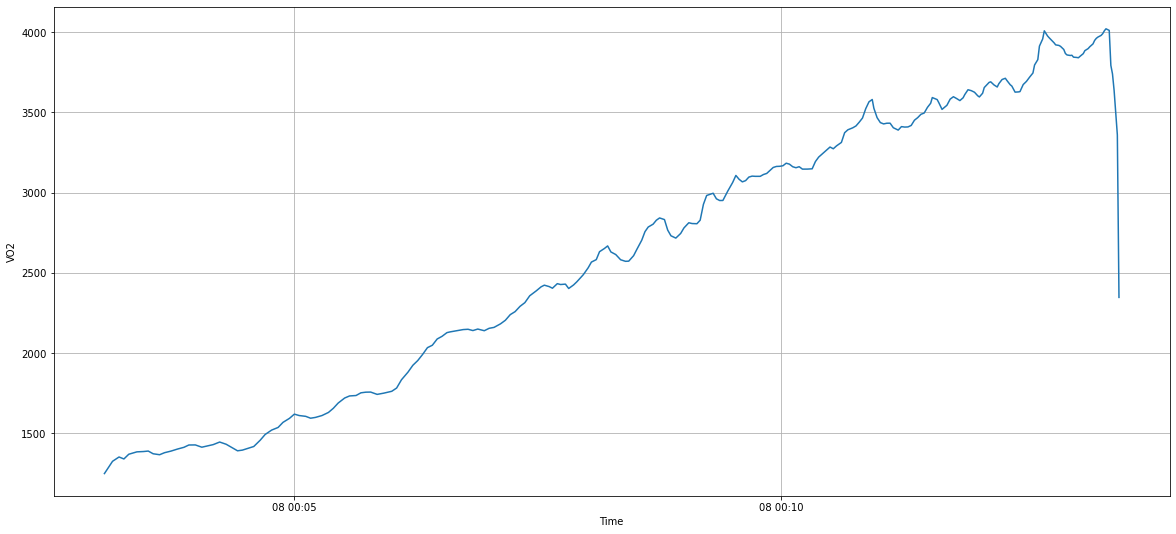

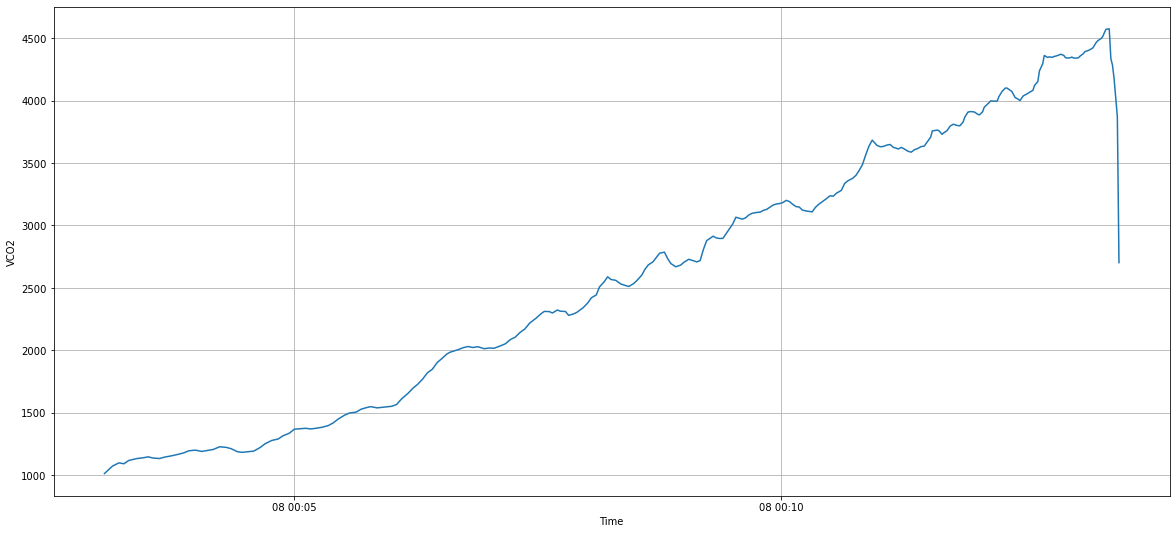

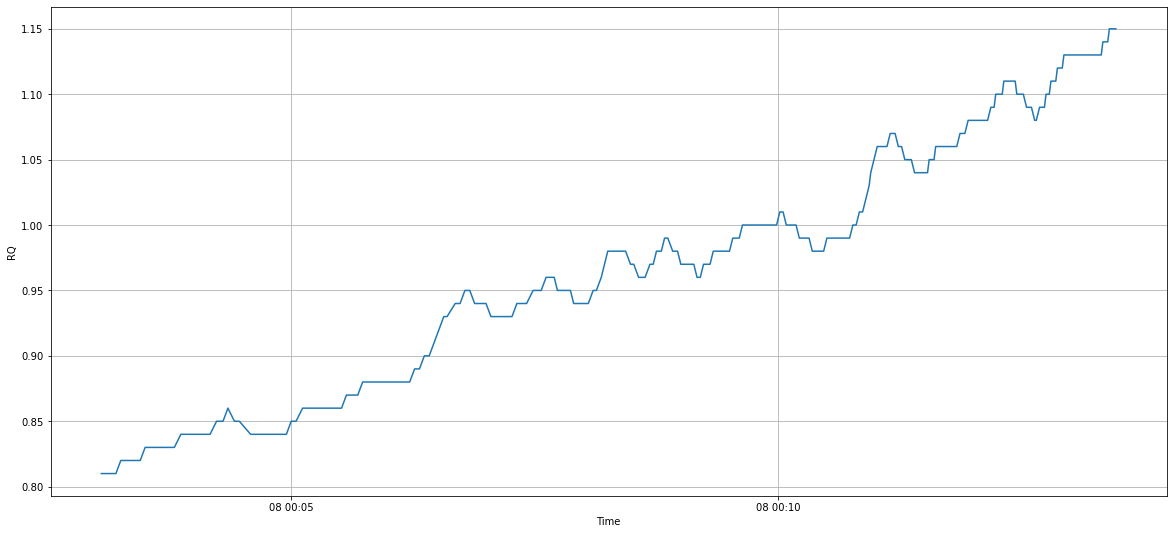

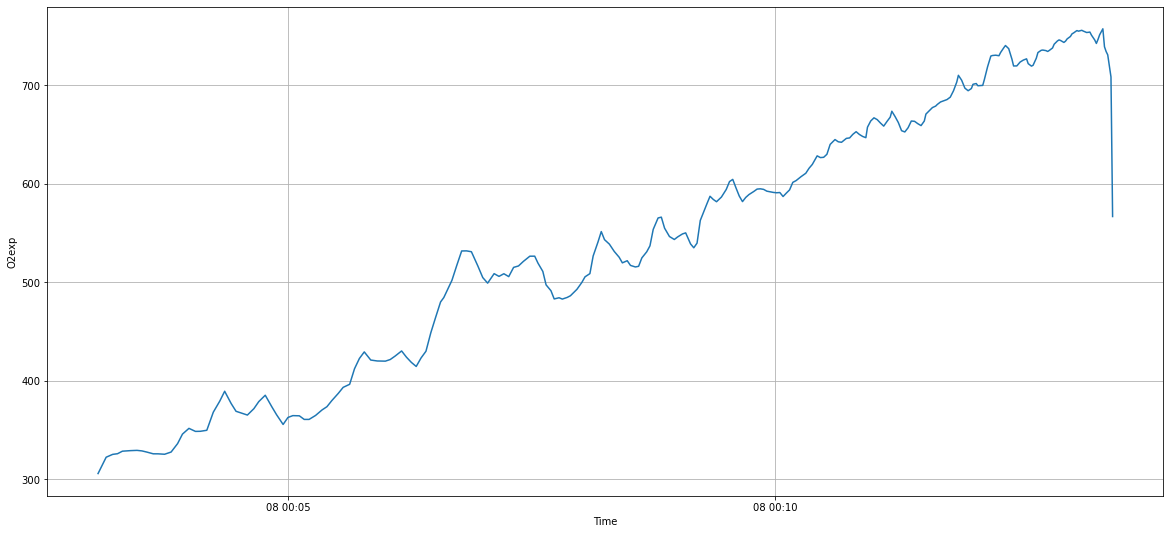

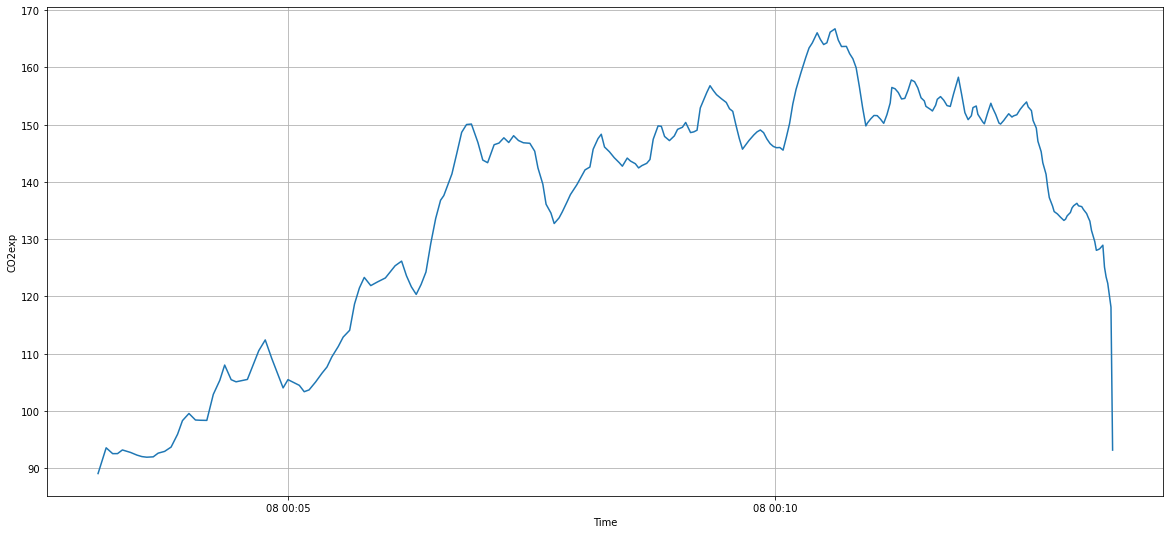

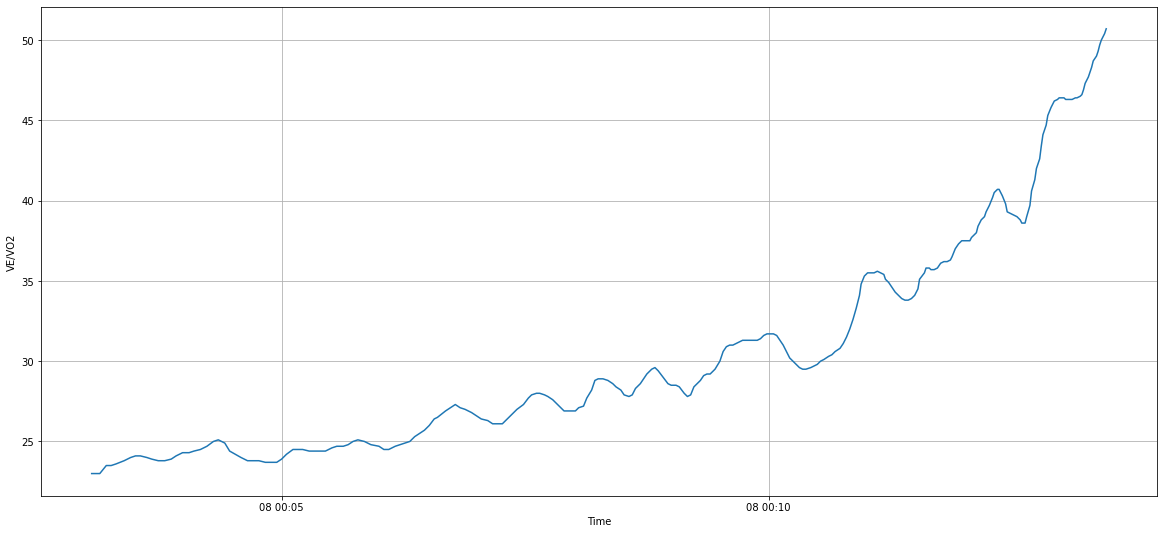

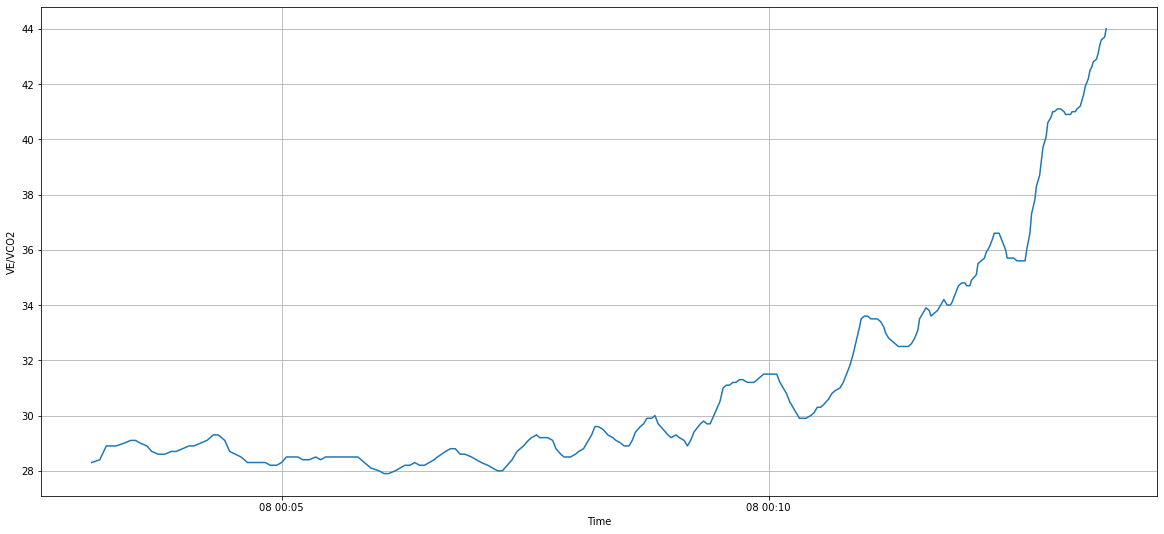

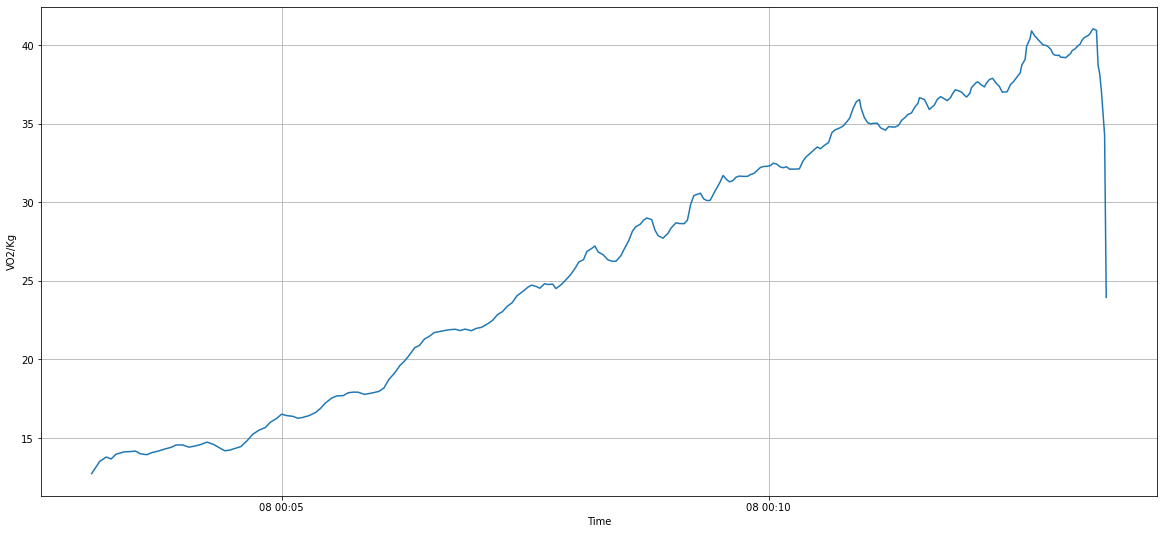

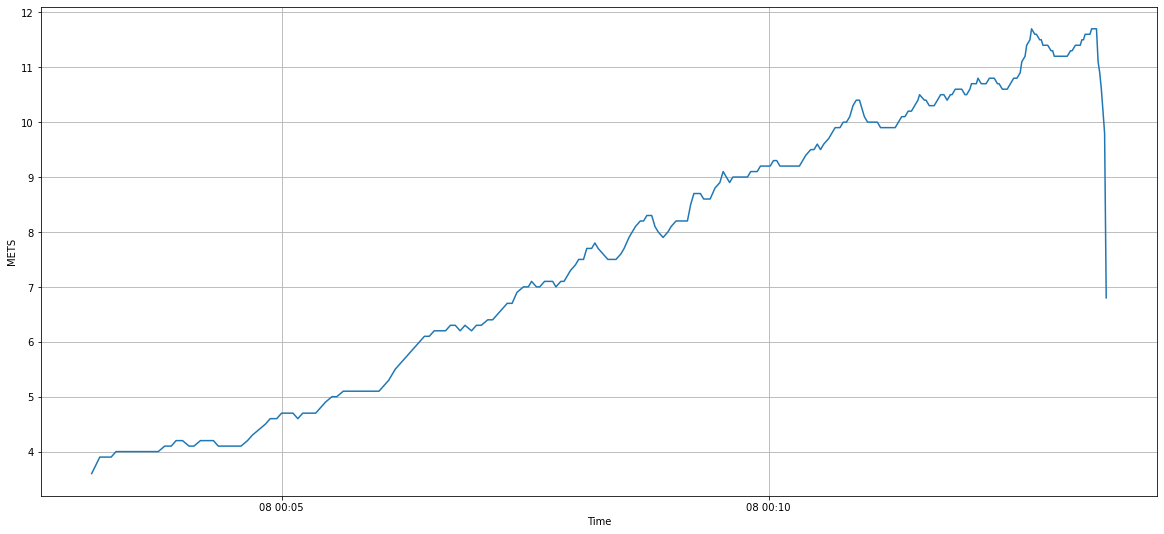

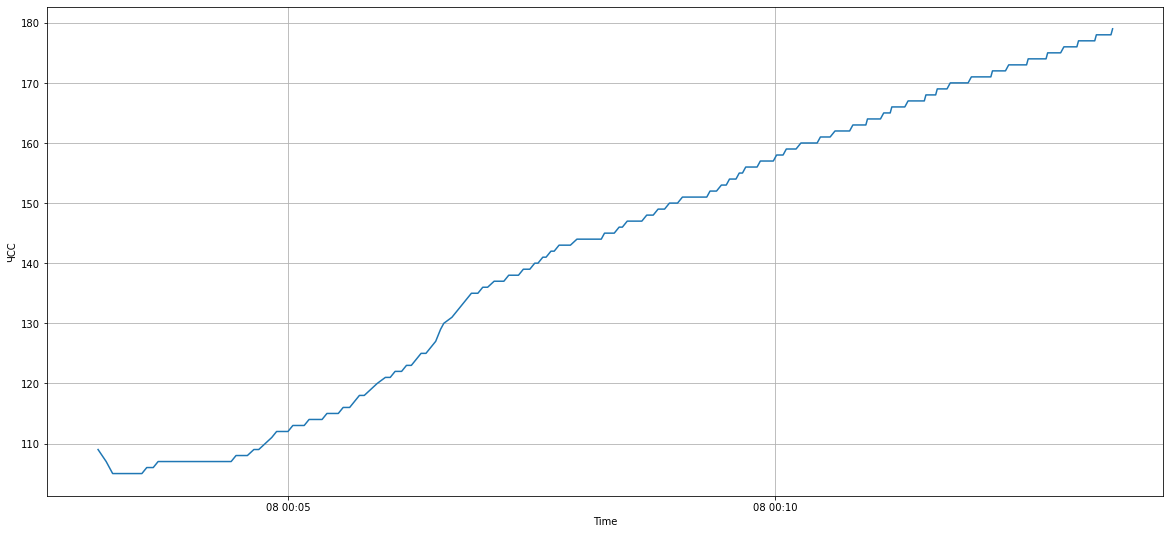

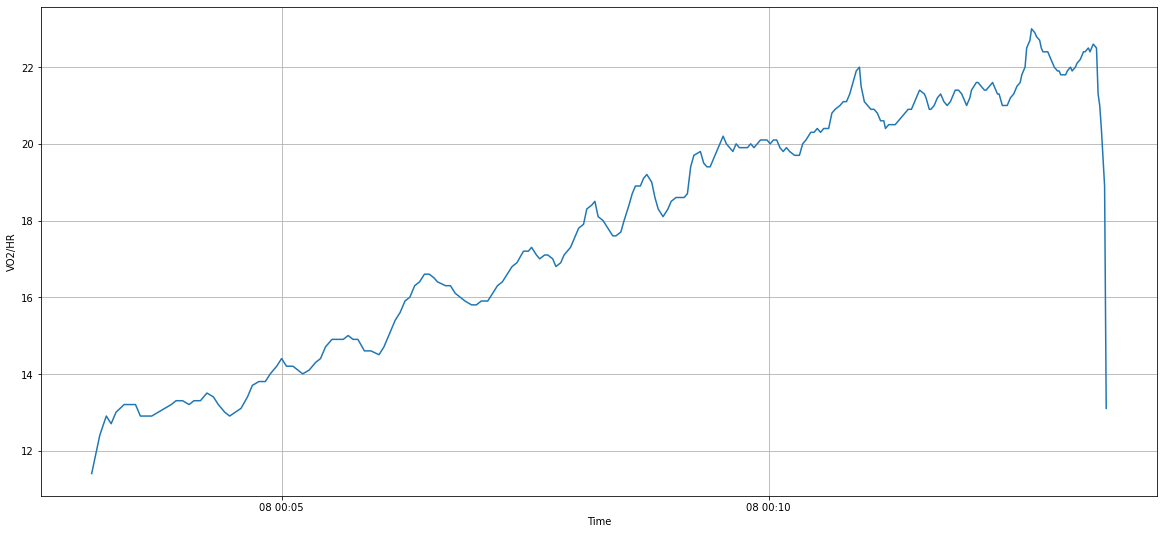

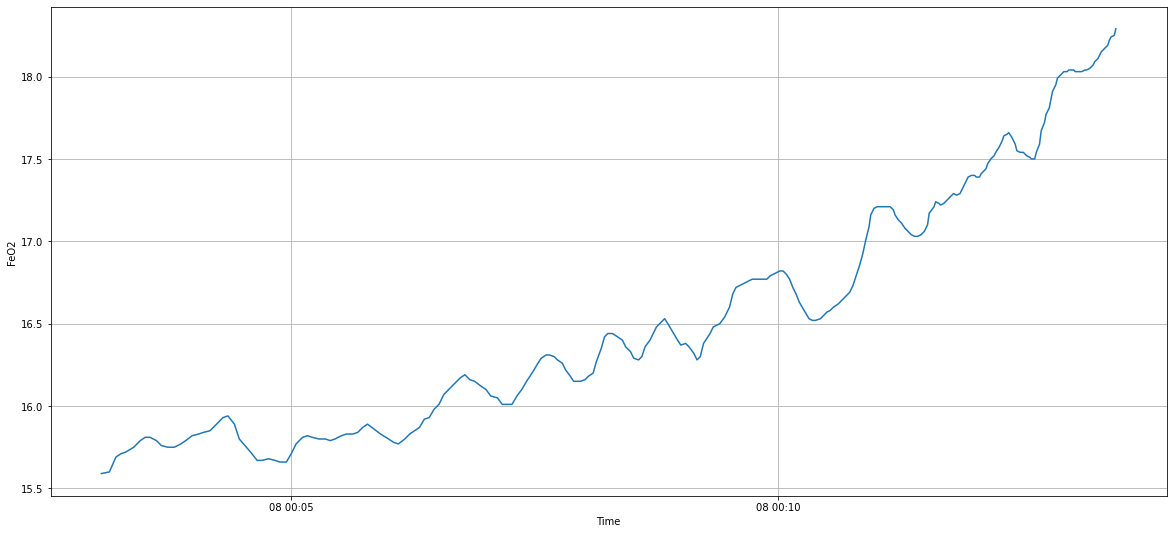

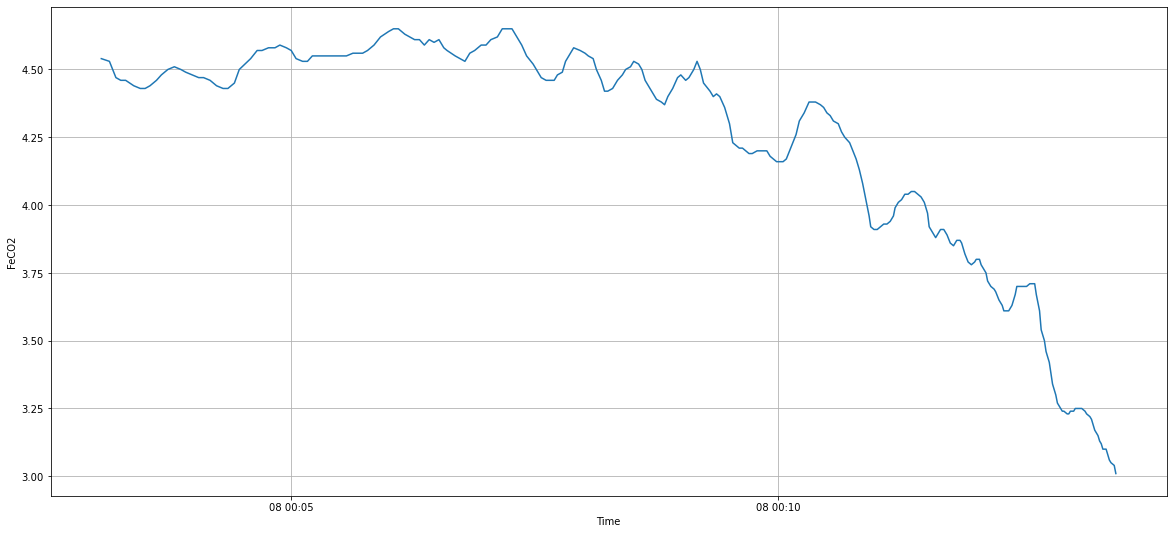

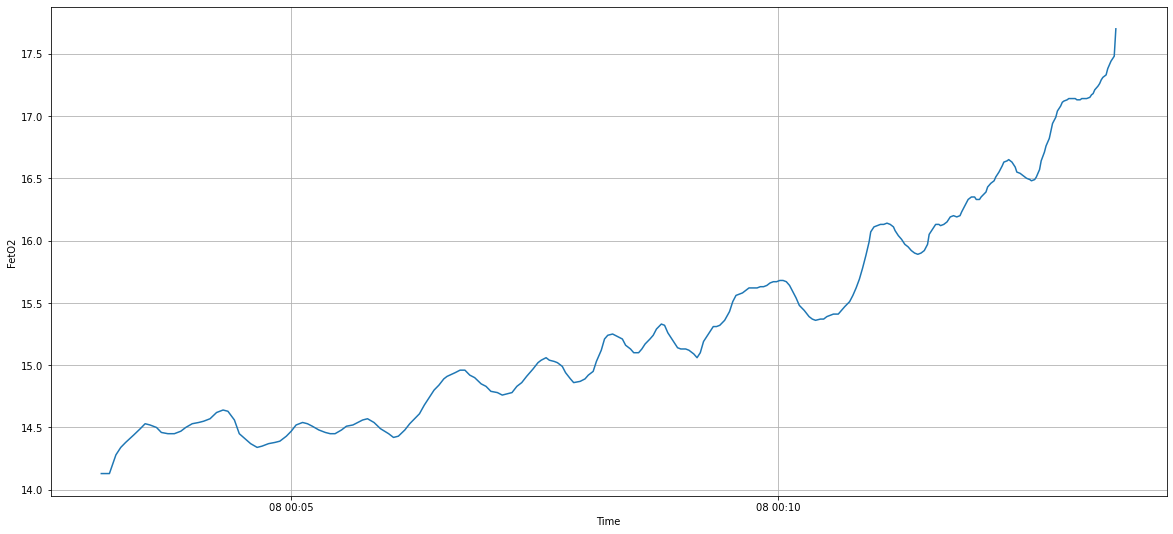

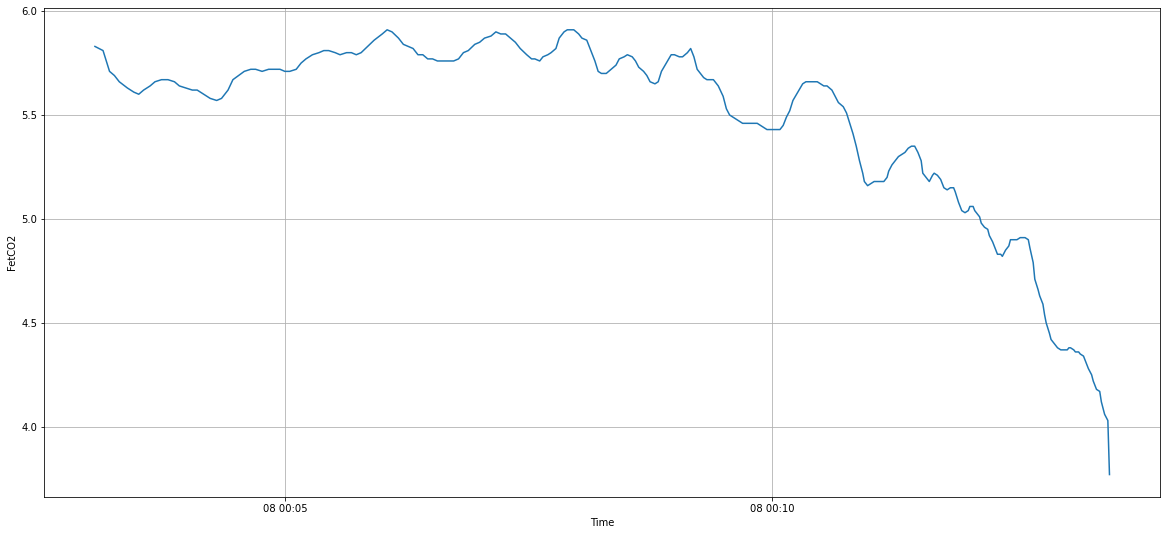

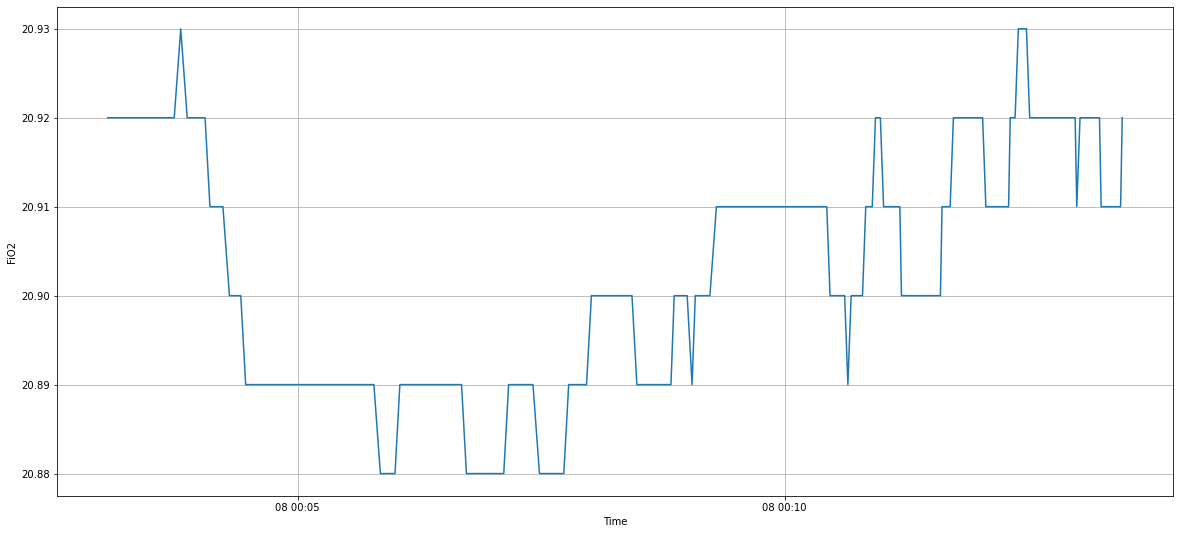

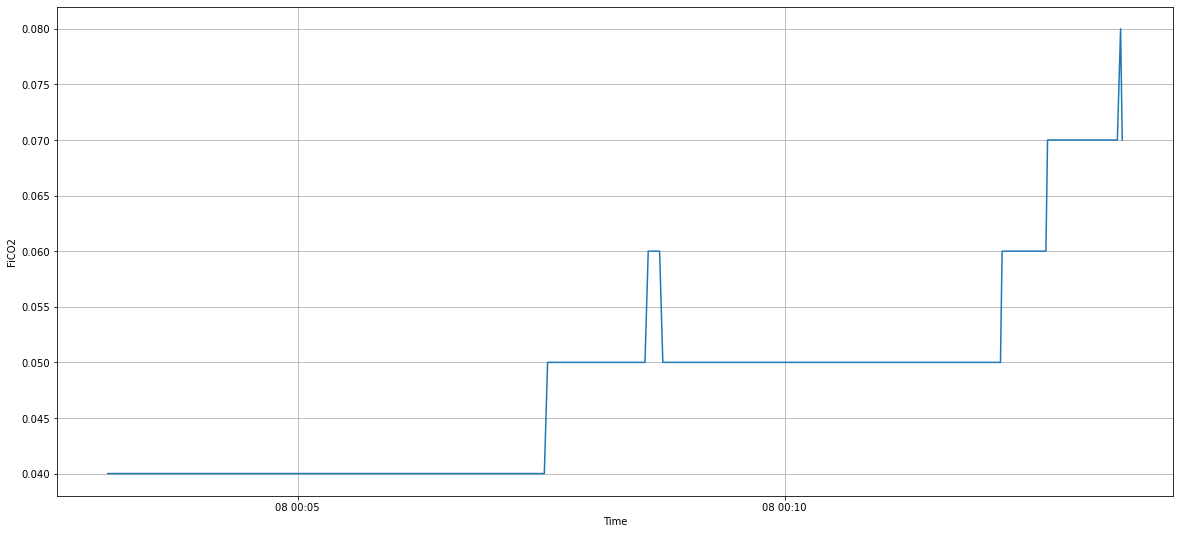

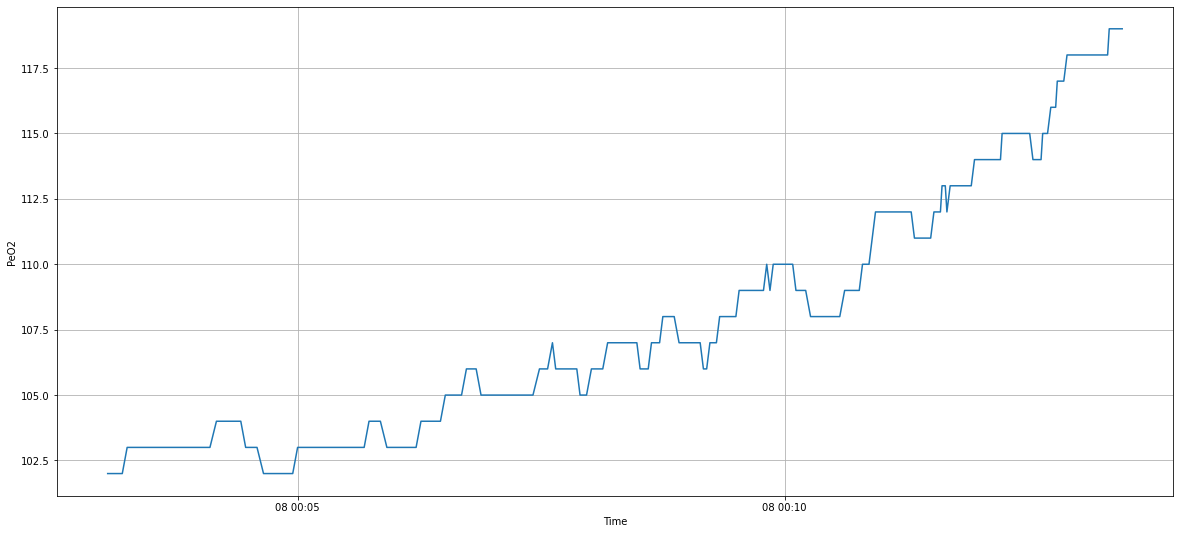

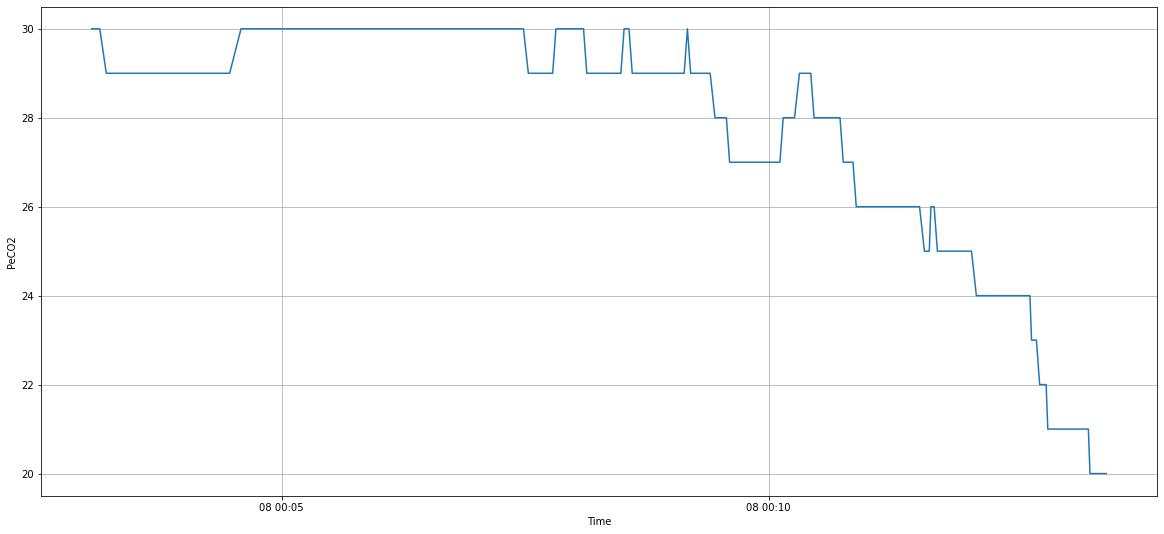

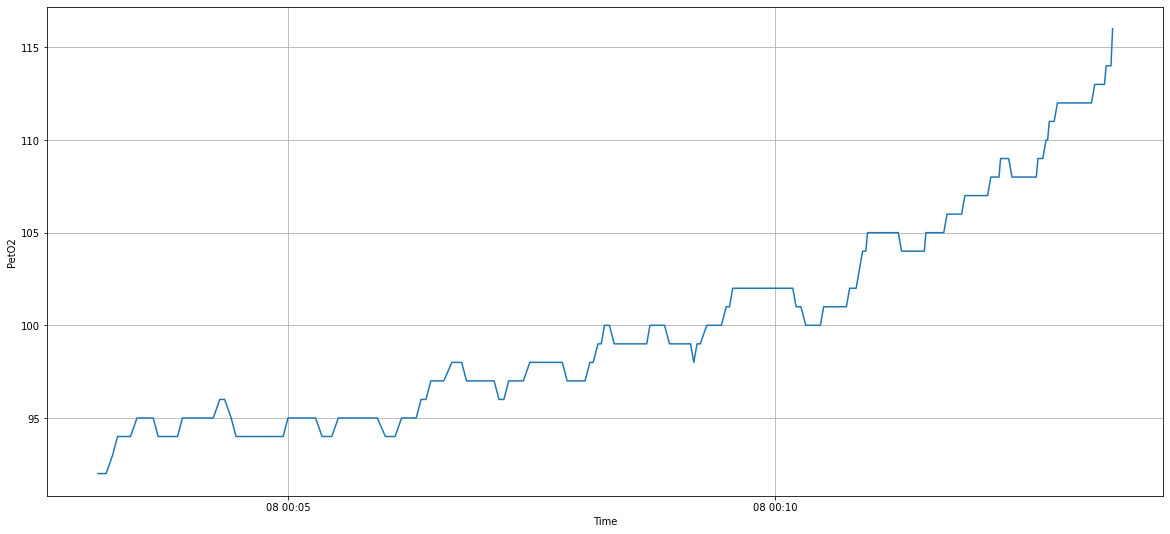

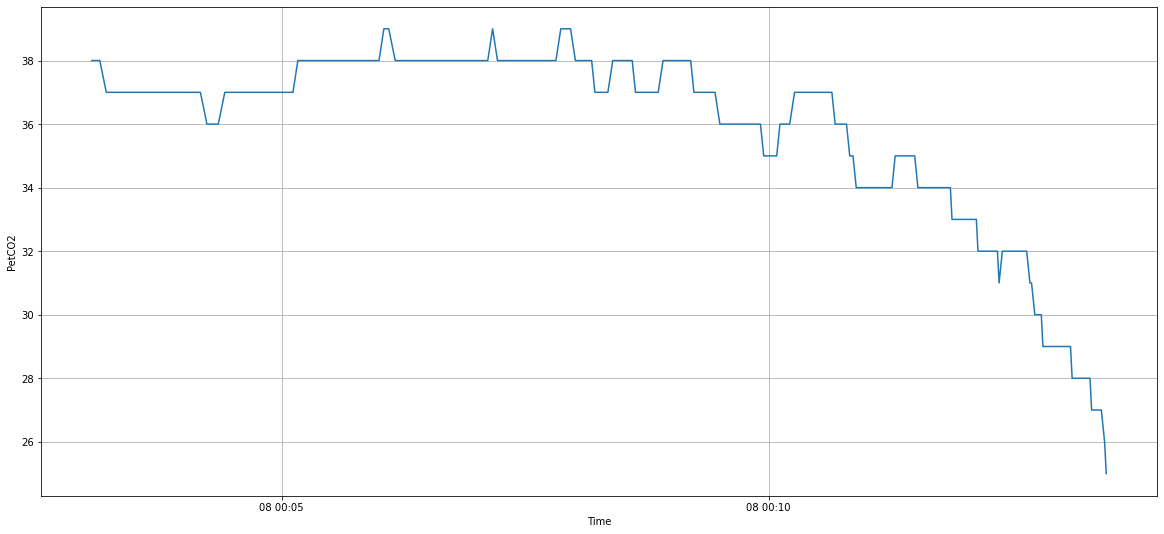

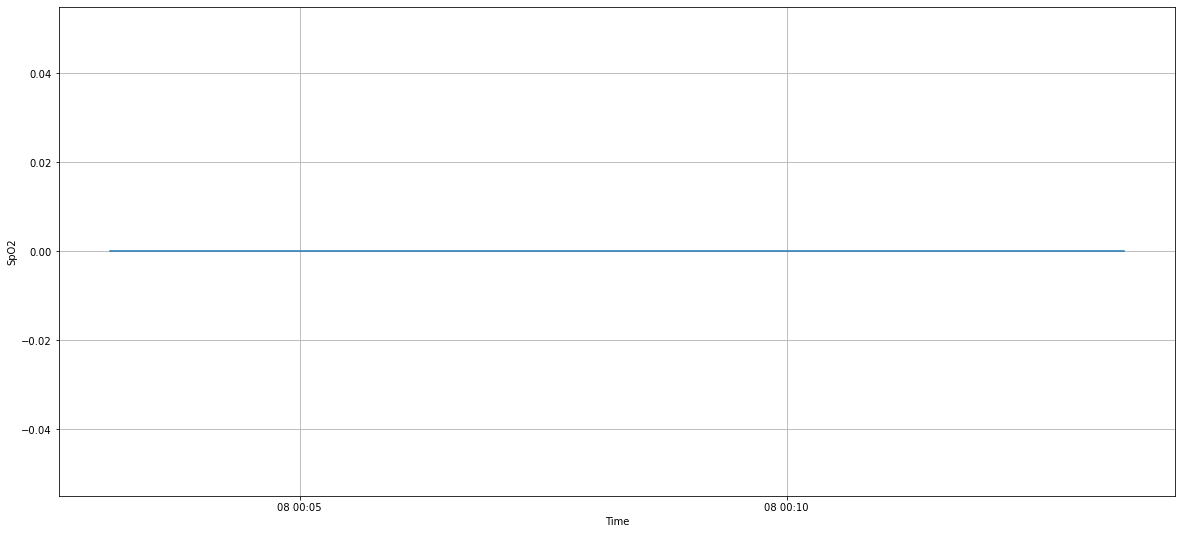

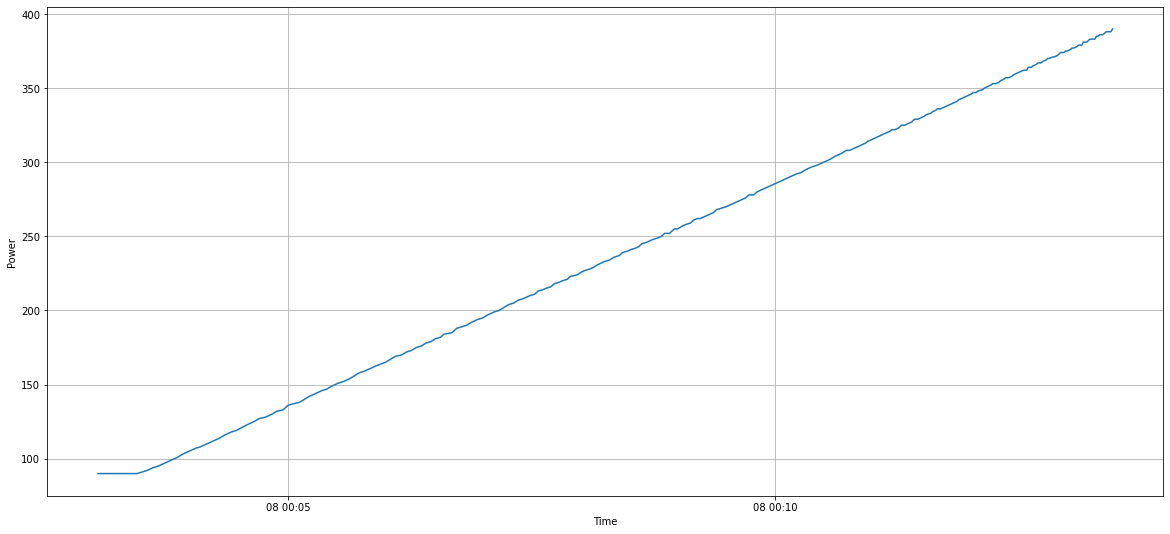

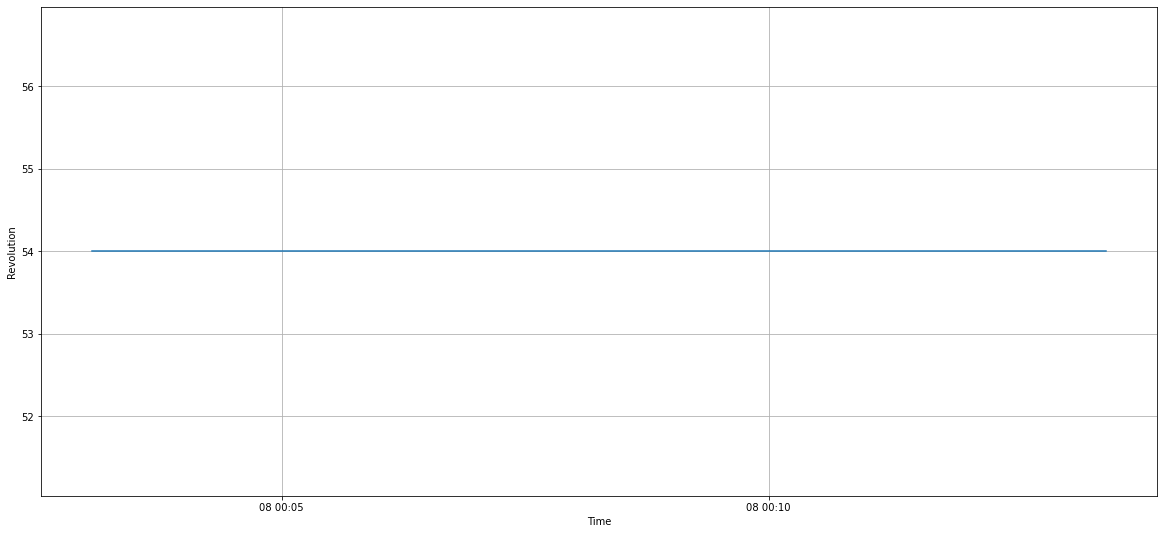

In [254]:
for column in draw_columns:
    plot_series(temp_data,'X10_1',column)

In [255]:
data['Revolution'].unique()

array([68., 66., 67., 65., 63., 69., 70., 71., 64., 62., 75., 73., 72.,
       78., 79., 76., 58., 54., 74., 77., 57., 80., 81., 82., 83., 84.,
       10., 61., 60., 59., 53., 55., 56., 52., 51., 50., 49., 38., 13.,
       24.,  0., 45., 26., 14., 30., 40., 85., 86., 88., 87., 92., 47.,
       28., 41.,  8., 22., 36.])

In [256]:
data['SpO2'].unique()

array([0.])

In [257]:
data.drop(columns = ['SpO2'], inplace = True)

In [259]:
column_not_series = ['Revolution','P Сист.','P. диастол.','Фаза']

In [264]:
series_column = [x for x in list(data.columns) if x not in [*column_not_series,'season','season_part','player','t']]

In [268]:
data1 = data.copy()

In [270]:
def show_anomalies(series, player, season, season_part, column, win_size, figsize, sigma_val=1.96,
                   plot_intervals=True, plot_rolling_mean_trend=True):
    series = series[(series['player'] == player)&(series['season'] == season)&
                   (series['season_part'] == season_part)][['t',column]].set_index('t')
    # Сглаживаем в зависимости от размера окна
    rolling_mean = series.rolling(window=win_size).mean()

    plt.figure(figsize=figsize)
    plt.title(f"Скользящее среднее Размер окна = {win_size}")
    if plot_rolling_mean_trend:
        plt.plot(rolling_mean,"g", label= "Скользящее Среднее (Тренд)")

    # Рисуем доверительные интервалы

    if plot_intervals:
        std = np.std(series[win_size:] - rolling_mean[win_size:])
        lower_bond = rolling_mean - (sigma_val * std)
        upper_bond = rolling_mean + (sigma_val * std)
        plt.plot(upper_bond, "r--", label="Верхняя Граница / Нижняя Bond")
        plt.plot(lower_bond, "r--")

    # Находим аномалии

    anomalies = pd.DataFrame(index=series.index, columns=series.columns)
    # anomalies[series[column]<lower_bond] = series[series[column]<lower_bond]
    # anomalies[series[column]>upper_bond] = series[series[column]>upper_bond]
    anomalies[series<lower_bond] = series[series<lower_bond]
    anomalies[series>upper_bond] = series[series>upper_bond]
    plt.plot(anomalies, "ro", markersize=18)

    plt.plot(series[win_size:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

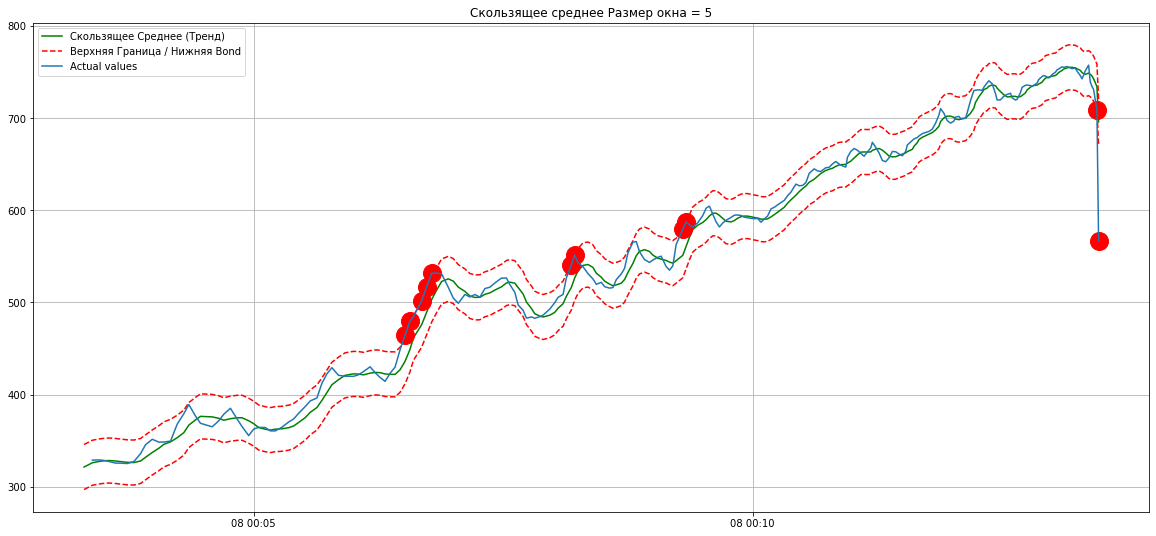

In [284]:
show_anomalies(data1,'X10_1','2020-2021',1,'O2exp',figsize = (20,9), win_size = 5)

In [285]:
def get_anomalies(series, player, season, season_part, column, win_size, sigma_val=1.96):
    
    series = series[(series['player'] == player)&(series['season'] == season)&
                   (series['season_part'] == season_part)][['t',column]].set_index('t')
    
    # Сглаживаем в зависимости от размера окна
    rolling_mean = series.rolling(window=win_size).mean()


    # Находим доверительные интервалы  
    std = np.std(series[win_size:] - rolling_mean[win_size:])
    lower_bond = rolling_mean - (sigma_val * std)
    upper_bond = rolling_mean + (sigma_val * std)

    # Находим аномалии
    anomalies = pd.DataFrame(index=series.index, columns=series.columns)
    anomalies[series<lower_bond] = series[series<lower_bond]
    anomalies[series>upper_bond] = series[series>upper_bond]
    

    return anomalies

In [287]:
def get_feature_from_anom(anomalies, column):
    anomalies = anomalies[anomalies.isna()[column] != True]
    return anomalies.count()[0], anomalies.mean()[0], anomalies.min()[0],anomalies.max()[0]

In [291]:
def generate_features(data):
    all_players_features = []
    
    for season in data['season'].unique():
        for season_part in data['season_part'].unique():
            for player in data['player'].unique():
                one_player_features = []
                for column in series_column:
                    anomalies = get_anomalies(data,player,season,season_part,column,5)
                    features = get_feature_from_anom(anomalies, column)
                    one_player_features.extend(features)
                all_players_features.append([*one_player_features,season,season_part,player])
        
    return all_players_features

In [292]:
new_features = generate_features(data1)

In [295]:
data_new = pd.DataFrame(new_features)

In [308]:
data_new = data_new.rename(columns = {104:'season',105:'season_part',106:'player'})

In [328]:
data_new

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,season,season_part,player
0,19,33.592632,15.13,48.78,21,2.703619,0.969,4.010,19,152.099474,...,35.666667,28.0,42.0,1,30.000000,30.0,30.0,2020-2021,2,X10_1
1,13,33.705385,19.42,50.00,16,2.297750,1.306,3.366,10,110.752000,...,48.000000,39.0,53.0,246,267.613821,99.0,405.0,2020-2021,2,X11_1
2,19,36.392632,18.93,51.14,16,3.507000,2.614,4.227,14,133.961357,...,36.500000,27.0,45.0,101,213.534653,100.0,325.0,2020-2021,2,X12_1
3,13,36.475385,19.93,49.59,13,1.689077,0.387,2.656,15,100.367200,...,33.857143,13.0,44.0,5,66.000000,30.0,90.0,2020-2021,2,X14_1
4,15,22.162000,9.52,46.51,17,3.213412,0.550,4.823,20,115.601700,...,42.666667,36.0,47.0,291,321.347079,102.0,505.0,2020-2021,2,X15_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,19,40.850000,32.16,47.95,14,3.171500,1.755,3.563,29,128.076138,...,39.347826,32.0,43.0,273,251.967033,98.0,379.0,2021-2022,1,X5_2
160,16,41.558125,32.80,50.56,15,2.399600,2.082,2.630,28,124.319143,...,44.230769,41.0,47.0,181,233.977901,94.0,411.0,2021-2022,1,X6_2
161,21,36.799524,22.34,49.90,33,2.127061,1.482,2.788,35,128.616714,...,37.000000,31.0,40.0,295,283.101695,99.0,446.0,2021-2022,1,X7_2
162,9,20.218889,16.28,27.78,11,3.043909,2.359,3.818,16,88.662688,...,42.320000,36.0,46.0,191,256.261780,101.0,383.0,2021-2022,1,X8_2


In [330]:
len(list(data_new['player'].unique()))

41

In [331]:
results = pd.read_csv('results_2_seasons.csv')

In [349]:
results['target'] = (results['passes']+results['goals'])/results['games_count']

In [359]:
df = data_new.merge(results[['season','player','age','target']], how = 'left', on = ['season','player'])

In [363]:
train_columns = [*list(range(0,104)),'age']

In [391]:
last_df = df.dropna()

In [392]:
X = last_df[train_columns]

In [393]:
y = last_df['target']

In [395]:
from sklearn.model_selection import train_test_split

In [396]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [397]:
from sklearn.linear_model import LinearRegression

In [398]:
reg = LinearRegression().fit(X_train, y_train)

In [399]:
reg.predict(X_test)

array([ 0.84686346, -0.16338741, -0.40589133,  0.80471595, -0.57391623,
       -0.27201411,  0.24719896,  0.42522269,  1.16136497, -0.34365744,
        0.76158122,  0.96808201,  0.23812745,  0.63148436, -0.13019337,
        1.00315025])

In [402]:
from sklearn.metrics import mean_squared_error

In [403]:
mean_squared_error(reg.predict(X_test),y_test)

0.5031361806045911

In [406]:
reg.predict(X_test)

array([ 0.84686346, -0.16338741, -0.40589133,  0.80471595, -0.57391623,
       -0.27201411,  0.24719896,  0.42522269,  1.16136497, -0.34365744,
        0.76158122,  0.96808201,  0.23812745,  0.63148436, -0.13019337,
        1.00315025])

In [405]:
y_test

50     0.589744
0      0.686047
42     0.567164
51     0.361702
18     0.516129
48     0.643678
10     0.361702
154    0.677966
4      0.475000
12     0.511111
110    1.172414
53     0.511111
151    1.172414
55     0.433333
152    1.014925
106    0.541667
Name: target, dtype: float64